# Setting up the Environment and Importing Libraries

In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Loading the Dataset

In [13]:
df = pd.read_csv('Advertising.csv')
print("Datset Loaded Successfully!")

Datset Loaded Successfully!


In [15]:
print("\nFirst 5 rows of the datset:")
print(df.head())


First 5 rows of the datset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# Initial Data Exploration(EDA)

In [18]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
print("\nDescriptive Statistics for numerical columns:")
print(df.describe())


Descriptive Statistics for numerical columns:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [22]:
print("\nMissing values in each column(NaN count):")
print(df.isnull().sum())


Missing values in each column(NaN count):
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [24]:
print("\nNumber of unique values in each columns:")
print(df.nunique())


Number of unique values in each columns:
Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64


In [26]:
print(f"\nNumber of duplicate rows:{df.duplicated().sum()}")


Number of duplicate rows:0


In [28]:
print("\nRaw Column Names:")
print(df.columns.tolist())


Raw Column Names:
['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


# Data Cleaning and Preprocessing

In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
print("\nColumn names after stripping whitespace and lowercasing:")
print(df.columns.tolist())


Column names after stripping whitespace and lowercasing:
['unnamed:_0', 'tv', 'radio', 'newspaper', 'sales']


In [35]:
if 'unnamed:_0' in df.columns:
    df.drop('unnamed:_0', axis=1, inplace=True)
    print("\n'unnamed;_0' column dropped.")


'unnamed;_0' column dropped.


In [41]:
if df.isnull().sum().sum() > 0:
    print(f"\nBefore handling missing values: {df.isnull().sum().sum()} total NaNs.")
    df.dropna(inplace=True)
    print(f"After handling missing values: {df.isnull().sum().sum()} total NaNs (rows dropped).")
else:
    print("\nNo missing values found in the dataset.")


No missing values found in the dataset.


In [43]:
print("\nData types after preprocessing:")
print(df.dtypes)


Data types after preprocessing:
tv           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


# Exploratory Data Analysis(EDA) and Visualization

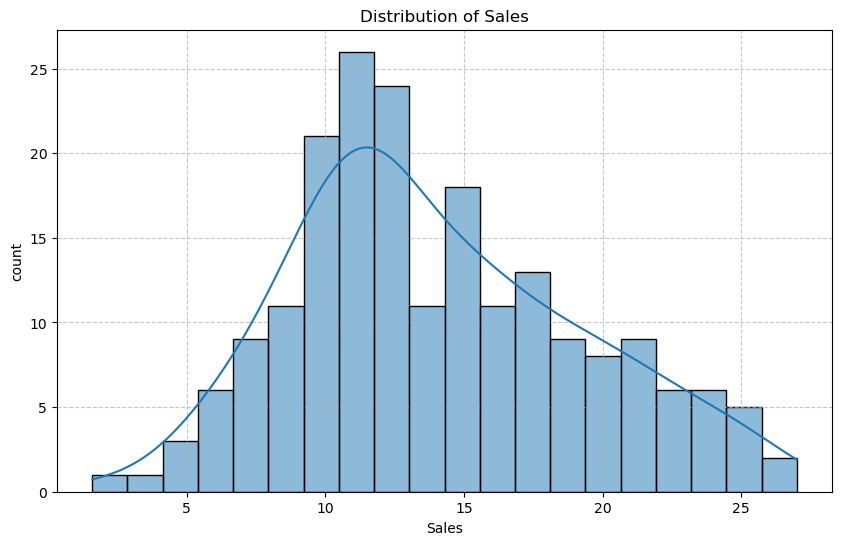

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df['sales'], kde=True, bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

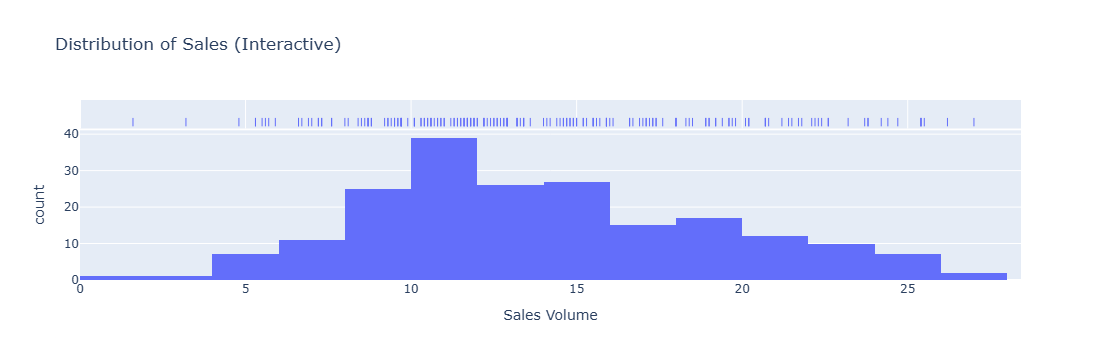

In [97]:
fig = px.histogram(df, x='sales', nbins=20, marginal="rug", title='Distribution of Sales (Interactive)', labels={'sales':'Sales Volume'})
fig.show()

In [99]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'sales' in numerical_features:
    numerical_features.remove('sales')

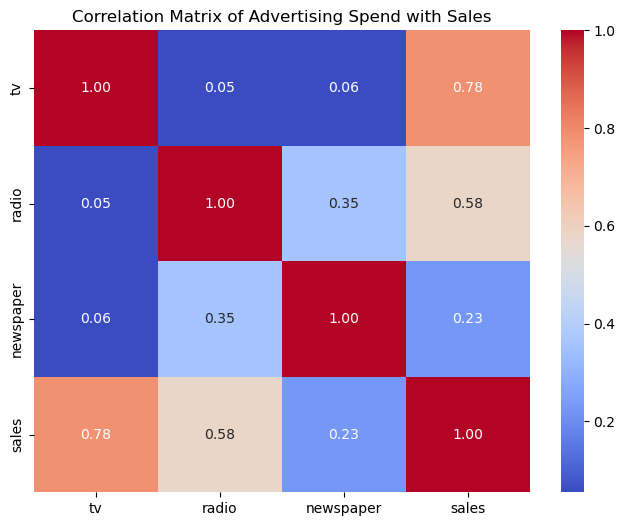

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features + ['sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Spend with Sales')
plt.show()

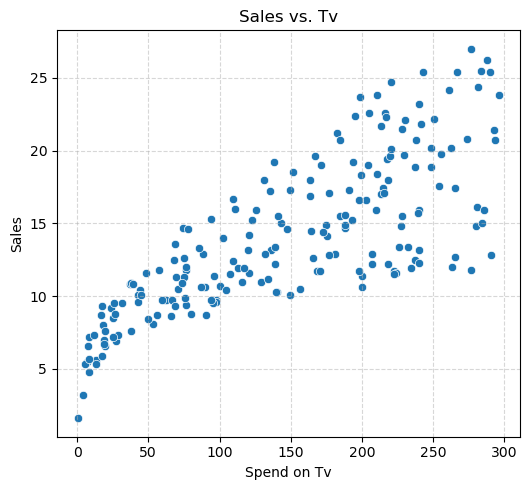

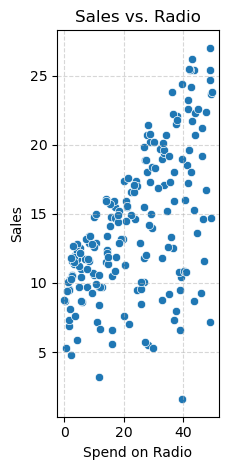

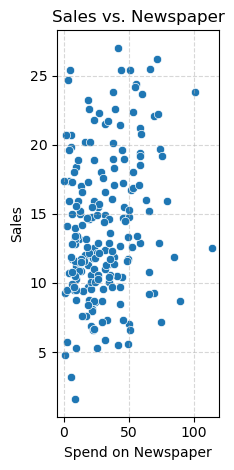

In [102]:
advertising_channels = ['tv', 'radio', 'newspaper']

plt.figure(figsize=(15, 5))
for i, channel in enumerate(advertising_channels):
    plt.subplot(1, len(advertising_channels), i + 1)
    sns.scatterplot(data=df, x=channel, y='sales')
    plt.title(f'Sales vs. {channel.replace("_", " ").title()}')
    plt.xlabel(f'Spend on {channel.replace("_", " ").title()}')
    plt.ylabel('Sales')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [103]:
for channel in advertising_channels:
    fig = px.scatter(df, x=channel, y='sales', title=f'Sales vs. {channel.replace("_", " ").title()}(Interactive)',
                     hover_data=['tv', 'radio', 'newspaper', 'sales'])
    fig.show()

# Model Training and Evaluation

In [105]:
X = df.drop('sales', axis=1)
y = df['sales']

In [107]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist() # Will likely be empty for 'advertising.csv'

print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: ['tv', 'radio', 'newspaper']
Categorical Features: []


In [108]:
numerical_transformer = StandardScaler() 
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

transformers_list = [('num', numerical_transformer, numerical_features)]
if categorical_features:
    transformers_list.append(('cat', categorical_transformer, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers_list)


In [109]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (160, 3)
Testing data shape: (40, 3)


In [111]:
print("\nTraining Linear Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Linear Regression model training complete.")


Training Linear Regression model...
Linear Regression model training complete.


In [113]:
y_pred_lr = lr_pipeline.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.4f}")


--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 1.46
Root Mean Squared Error (RMSE): 1.78
R-squared (R2): 0.8994


In [114]:
print("\nTraining Random Forest Regressor model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest Regressor model training complete.")


Training Random Forest Regressor model...
Random Forest Regressor model training complete.


In [115]:
y_pred_rf = rf_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.4f}")


--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.62
Root Mean Squared Error (RMSE): 0.77
R-squared (R2): 0.9813


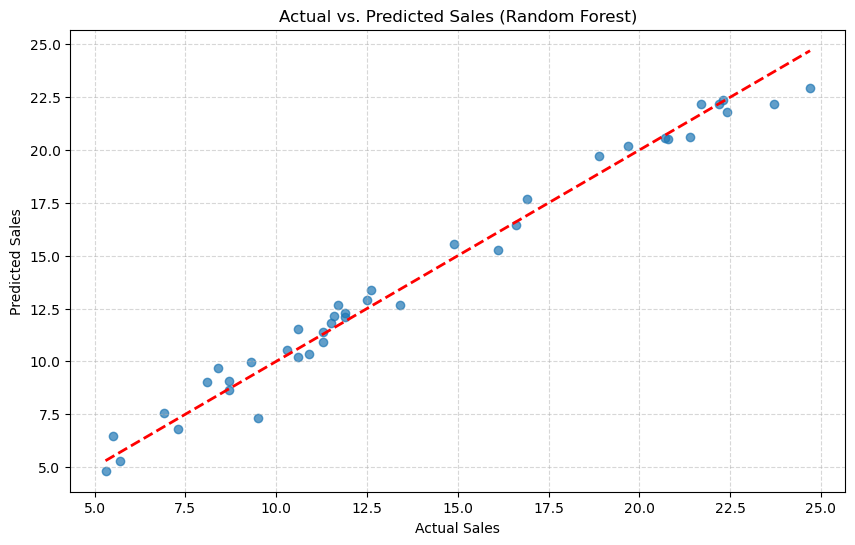

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

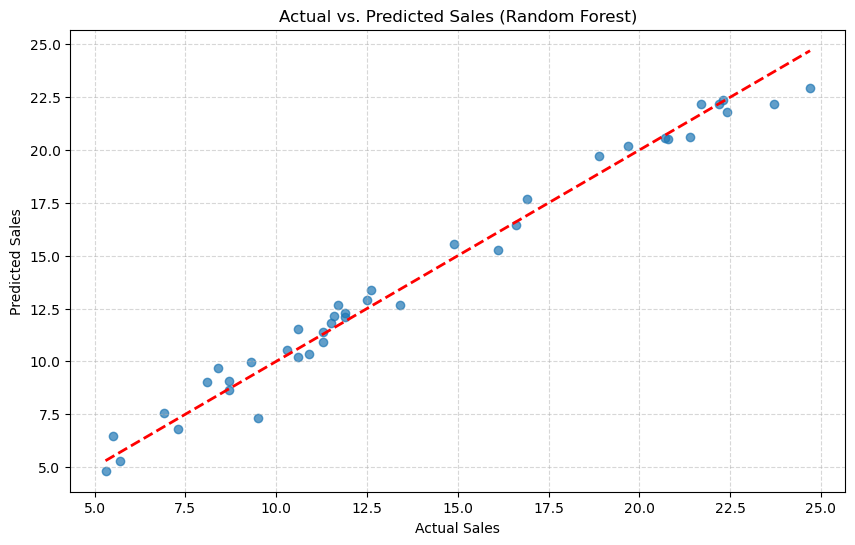

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\nPerforming 5-Fold Cross-Validation for Random Forest Regressor...")
cv_r2_scores_rf = cross_val_score(rf_pipeline, X, y, cv=kf, scoring='r2')
cv_mae_scores_rf = -cross_val_score(rf_pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')

print(f"Cross-validation R-squared Scores (Random Forest): {cv_r2_scores_rf}")
print(f"Mean Cross-validation R-squared (Random Forest): {cv_r2_scores_rf.mean():.4f}")
print(f"Std Deviation of Cross-validation R-squared (Random Forest): {cv_r2_scores_rf.std():.4f}")

print(f"\nCross-validation MAE Scores (Random Forest): {cv_mae_scores_rf}")
print(f"Mean Cross-validation MAE (Random Forest): {cv_mae_scores_rf.mean():.2f}")
print(f"Std Deviation of Cross-validation MAE (Random Forest): {cv_mae_scores_rf.std():.2f}")


Performing 5-Fold Cross-Validation for Random Forest Regressor...
Cross-validation R-squared Scores (Random Forest): [0.98378217 0.98316421 0.98140783 0.98455081 0.97095773]
Mean Cross-validation R-squared (Random Forest): 0.9808
Std Deviation of Cross-validation R-squared (Random Forest): 0.0050

Cross-validation MAE Scores (Random Forest): [0.60485  0.41465  0.517175 0.52435  0.6298  ]
Mean Cross-validation MAE (Random Forest): 0.54
Std Deviation of Cross-validation MAE (Random Forest): 0.08


# Conclusion